In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split

In [3]:
# download the required NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
# define the function for lemmatizing
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [5]:
# define the function for removing extra spaces
def preprocess_text(text): 

    return re.sub(r'\s+', ' ', text)

In [6]:
ori_data = pd.read_csv('/content/drive/MyDrive/fake reviews dataset.csv')
new_data = pd.read_csv('/content/drive/MyDrive/new_fake_reviews_data.csv')

In [7]:
# apply the function for removing extra spaces on the data
ori_data['text_space'] = ori_data['text_'].apply(preprocess_text)
new_data['text_space'] = new_data['text_'].apply(preprocess_text)

In [8]:
# apply the function for lemmatization on the data
ori_data['text_final'] = ori_data['text_space'].apply(lemmatize)
new_data['text_final'] = new_data['text_space'].apply(lemmatize)

In [9]:
# create a new column for sentiment based on the rating
ori_data['sentiment'] = [1 if rating > 3 else 0 for rating in ori_data['rating']]
new_data['sentiment'] = [1 if rating > 3 else 0 for rating in new_data['rating']]

In [10]:
# create a new column containing the count of words
ori_data['word_count'] = ori_data['text_final'].str.split().str.len()
new_data['word_count'] = new_data['text_final'].str.split().str.len()

In [11]:
# delete the unnecessary columns
ori_data = ori_data.drop(['text_', 'text_space'], axis=1)
new_data = new_data.drop(['text_', 'text_space'], axis=1)

(array([2.3430e+03, 1.1387e+04, 6.4620e+03, 3.9110e+03, 2.7600e+03,
        2.2060e+03, 1.5740e+03, 1.3730e+03, 1.0210e+03, 8.8000e+02,
        8.1200e+02, 6.3200e+02, 6.2500e+02, 5.0700e+02, 4.3200e+02,
        4.6900e+02, 3.7900e+02, 3.8200e+02, 3.1200e+02, 3.3800e+02,
        3.1700e+02, 3.1800e+02, 2.7200e+02, 1.6500e+02, 1.4800e+02,
        1.4300e+02, 1.3100e+02, 9.9000e+01, 2.9000e+01, 5.0000e+00]),
 array([  1. ,  13.4,  25.8,  38.2,  50.6,  63. ,  75.4,  87.8, 100.2,
        112.6, 125. , 137.4, 149.8, 162.2, 174.6, 187. , 199.4, 211.8,
        224.2, 236.6, 249. , 261.4, 273.8, 286.2, 298.6, 311. , 323.4,
        335.8, 348.2, 360.6, 373. ]),
 <BarContainer object of 30 artists>)

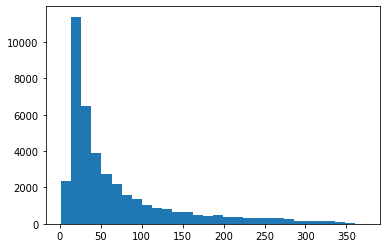

In [13]:
plt.hist(ori_data['word_count'], bins=30)

(array([6.3910e+03, 1.1314e+04, 6.0330e+03, 3.7890e+03, 2.5970e+03,
        1.8670e+03, 1.7160e+03, 1.5940e+03, 1.4750e+03, 9.9300e+02,
        5.5700e+02, 3.2200e+02, 2.6600e+02, 2.2200e+02, 1.9700e+02,
        2.3400e+02, 2.0300e+02, 1.9500e+02, 1.8100e+02, 1.7200e+02,
        9.8000e+01, 1.0000e+01, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  1.        ,  17.93333333,  34.86666667,  51.8       ,
         68.73333333,  85.66666667, 102.6       , 119.53333333,
        136.46666667, 153.4       , 170.33333333, 187.26666667,
        204.2       , 221.13333333, 238.06666667, 255.        ,
        271.93333333, 288.86666667, 305.8       , 322.73333333,
        339.66666667, 356.6       , 373.53333333, 390.46666667,
        407.4       , 424.33333333, 441.26666667, 458.2       ,
        475.13333333, 492.06666667, 509.        ]),
 <BarContainer object of 30 artists>)

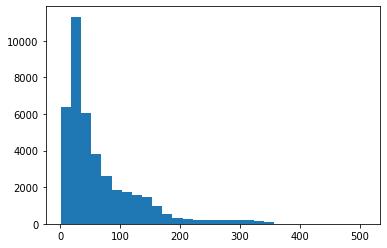

In [14]:
plt.hist(new_data['word_count'], bins=30)

In [16]:
# converting the count of words column to a categorical one

# define the ranges for the categorical values
bins_ori = [0, 10, 20, 50, 100, max(ori_data['word_count'])]

# define the labels for the categorical values
labels = [0, 1, 2, 3, 4]

# convert the numerical column to a categorical column based on the ranges and labels
ori_data['word_count_categories'] = pd.cut(ori_data['word_count'], bins=bins_ori, labels=labels)

In [23]:
# define the ranges for the categorical values
bins_new = [0, 10, 20, 50, 100, max(new_data['word_count'])]

# convert the numerical column to a categorical column based on the ranges and labels
new_data['word_count_categories'] = pd.cut(new_data['word_count'], bins=bins_new, labels=labels)

In [24]:
# delete the unnecessary columns
ori_data = ori_data.drop(['word_count'], axis=1)
new_data = new_data.drop(['word_count'], axis=1)

In [25]:
# download final dataset
ori_data.to_csv('ori_data_final.csv', index=False)
new_data.to_csv('new_data_final.csv', index=False)

In [26]:
# shuffle the data
ori_data = ori_data.sample(frac=1).reset_index(drop=True)

# split the data into training (80%), validation (10%), and testing (10%) sets
ori_train_df, ori_rem_df = train_test_split(ori_data, test_size=0.2, random_state=42)
ori_val_df, ori_test_df = train_test_split(ori_rem_df, test_size=0.5, random_state=42)

# save the splits into separate CSV files
ori_train_df.to_csv('ori_data_final_train.csv', index=False)
ori_val_df.to_csv('ori_data_final_val.csv', index=False)
ori_test_df.to_csv('ori_data_final_test.csv', index=False)

In [27]:
# shuffle the data
new_data = new_data.sample(frac=1).reset_index(drop=True)

# split the data into training (80%), validation (10%), and testing (10%) sets
new_train_df, new_rem_df = train_test_split(new_data, test_size=0.2, random_state=42)
new_val_df, new_test_df = train_test_split(new_rem_df, test_size=0.5, random_state=42)

# save the splits into separate CSV files
new_train_df.to_csv('new_data_final_train.csv', index=False)
new_val_df.to_csv('new_data_final_val.csv', index=False)
new_test_df.to_csv('new_data_final_test.csv', index=False)